# **Segmentación de Clientes con Tarjetas de Crédito: Desde el Análisis Exploratorio Hasta la Toma de Decisiones Estratégicas** 💳📊

![Descripción de la imagen](https://akm-img-a-in.tosshub.com/businesstoday/images/story/202411/673722e08ac8f-credit-card-rule-change-153050804-16x9.jpg?size=948:533)


*Desarrollo del proyecto:*
1. **Introducción** 📖
  
  Descripción general del dataset. 📂

  Alcance del presente proyecto. 🎯
  

2. **Análisis Exploración de Datos (EDA)** 🔍

  Carga y limpieza del dataset.

  Analisis de las características a utilizar.

  Estadística Descriptiva de los datos.

  Visualizaciones para una mejor comprensión de los perfiles de clientes. Diagramas de caja. Mapa de calor.
3. **Modelado** 🤖

  Clustering: Para segmentar clientes:

  KMeans

  DBSCAN

4. **Análisis de la segmentación** 📊

  Visualizaciones claras de patrones.
Comparación de comportamientos y analisis de los clusters.
5. **Conclusiones y Mejoras a Futuro** 🏁

  Resumen de los hallazgos.
Estrategias para mejorar la experiencia del cliente y optimizar el negocio.

##**Introducción**

En este proyecto, nos adentramos en el mundo de la segmentación de clientes bancarios que utilizan tarjetas de crédito. El objetivo principal es identificar patrones de comportamiento y agrupar a los clientes en segmentos homogéneos para diseñar estrategias personalizadas que mejoren la experiencia del cliente y optimicen el negocio. 💼✨

El dataset utilizado contiene información clave sobre los clientes, como su límite de crédito promedio, número de tarjetas de crédito, visitas al banco, visitas en línea y llamadas realizadas. A través de un análisis exhaustivo y la aplicación de técnicas de clustering, buscamos descubrir insights valiosos que permitan tomar decisiones estratégicas basadas en datos. 🔍📈

**Alcance del Proyecto** 🎯

El presente proyecto tiene como objetivo:


*   Realizar un **análisis exploratorio de datos (EDA)** para comprender las características del dataset. 🔎
*   Aplicar técnicas de **clustering** (K-Means y DBSCAN) para segmentar a los clientes en grupos homogéneos. 🧩
*   Analizar la segmentación generada 📊
*   Proponer **estrategias personalizadas** para mejorar la experiencia del cliente y optimizar el negocio basado en los segmentos identificados. 💡


## **Analisis Exploratorio**

**Carga y limpieza del dataset**

In [ ]:
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
#Importamos las librerías necesarias para trabajar con el dataset

# Manipulación y Preprocesamiento
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Modelado y Cálculo de Distancias
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product  # Para generar combinaciones de hiperparámetros

# Utilidades
import numpy as np




In [ ]:
import os
# Vamos a cargar el dataset desde Kaggle
# Importamos la librería
import kagglehub

# Descargamos la última version del archivo
path = kagglehub.dataset_download("rupindersinghrana/credit-card-customer-segmentation")
print("Path to dataset files:", path)

# Buscamos el archivo CSV dentro del directorio descargado
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]

# Construimos la ruta completa al archivo CSV
file_path = os.path.join(path, csv_file)

# Leemos el archivo CSV
df = pd.read_csv(file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/rupindersinghrana/credit-card-customer-segmentation/versions/1


El análisis exploratorio de datos es un paso fundamental en cualquier proyecto de ciencia de datos. Su propósito es comprender las características principales del dataset y extraer información relevante para la toma de decisiones y los análisis posteriores. En este proyecto, incluye los siguientes puntos:


**1. Comprensión Inicial del Dataset**
  - Examinar el tamaño del dataset, identificar columnas y su significado.

**2. Limpieza de Datos**
- Corroborar la existencia o no de valores nulos, datos duplicados y outliers.


**3. Estadísticas Descriptivas**
  - Obtener métricas como media, mediana, moda, desviación estándar, valores mínimos y máximos.
  - Visualizar las distribuciones de los datos numéricos para detectar sesgos.

**4. Visualización de las Relaciones entre Variables**
  - Analizar las relaciones lineales entre variables numéricas.
  - Crear un mapa de calor para identificar posibles dependencias.
  - Observar relaciones entre pares de variables numéricas.
  - Examinar las distribuciones y variaciones por categorías.

**5. Análisis Específico para Clustering**
  - Estandarización para trabajar con distancias equivalentes en clustering.
  - Identificar las columnas más importantes en función de su varianza y utilidad.



El Analisis exploratorio nos ayuda a detectar patrones, identificar problemas (como datos sucios o variables irrelevantes) y definir estrategias para modelar los datos. Además, permite establecer hipótesis iniciales y guiar las decisiones de las etapas posteriores, como la selección de algoritmos y la optimización de modelos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Vamos a eliminar las columnas que no tienen importancia para el analiss de datos, como son Customer Key y Sl_No que parece representar el index de cada instancia

In [ ]:
df2 = df.drop(['Customer Key', 'Sl_No'], axis=1)

In [ ]:
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


**Instancias Duplicadas**

Chequeamos si tenemos instancias duplicadas y las eliminimos dado el caso.
Esto es importante ya que dichas observaciones pueden estar sobrerrepresentadas. Esto puede hacer que el modelo aprenda patrones incorrectos y afecte su capacidad de generalización.

In [ ]:
# Verificamos si hay instancias duplicadas
duplicados = df2.duplicated().sum()
print(f"Número de instancias duplicadas: {duplicados}")

Número de instancias duplicadas: 11


In [ ]:
# Eliminamos duplicados del DataFrame
df2 = df2.drop_duplicates()

# Verificamos que se eliminaron correctamente
duplicados_post = df2.duplicated().sum()
print(f"Número de instancias duplicadas después de la limpieza: {duplicados_post}")

Número de instancias duplicadas después de la limpieza: 0


**Valores nulos**

Verificar y tratar valores nulos es fundamental para asegurar que el análisis de datos y los modelos de machine learning sean precisos, confiables y libres de sesgos. Ignorar los valores nulos puede generar errores, sesgos en los resultados y pérdida de información valiosa.

In [ ]:
df2.isnull().sum()

,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


Al no haber datos faltantes, continuamos con nuestro preprocesamiento de los datos.

**Estadística Descriptiva**

Es un paso fundamental, nos permite hacer una exploración rápida del dataset, para detectar errores y valores atípicos, conocer la distribución de los datos, evaluar relaciones entre variables y comparar características clave.

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


**Escalado de Datos:**

Utilizamos StandardScaler para estandarizar las características del dataset. Este método ajusta cada característica a una media de 0 y una desviación estándar de 1. Este proceso es crucial para algoritmos sensibles a la escala, como K-Means, ya que garantiza que todas las variables tengan igual peso en el análisis, independientemente de sus unidades originales.

In [ ]:
escalador = StandardScaler()
df2_escalado = escalador.fit_transform(df2)
df2_escalado

array([[ 1.72349946, -1.24708705, -0.86060646, -0.55040688, -1.24844298],
       [ 0.40020878, -0.78670054, -1.47640975,  2.49980809,  1.88123746],
       [ 0.40020878,  1.05484553, -0.86060646,  0.12741867,  0.14252611],
       ...,
       [ 2.91446107,  1.51523205, -0.86060646,  2.16089532, -0.9007007 ],
       [ 3.62903804,  2.43600508, -0.86060646,  4.19437197, -1.24844298],
       [ 3.49670897,  1.97561857, -1.47640975,  3.17763364, -0.55295843]])

**Creación de DataFrame Escalado:**

Convertimos la matriz escalada df2_escalado en un DataFrame de pandas, asignando sus nombres de columnas originales desde df2_escalado.columns. Para mayor claridad, redondeamos los valores a dos decimales, facilitando la interpretación de los resultados en análisis y visualizaciones posteriores.

In [ ]:
df_escalado = pd.DataFrame(np.round(df2_escalado, 2), columns=df2.columns)

In [ ]:
df_escalado.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.72,-1.25,-0.86,-0.55,-1.25
1,0.40,-0.79,-1.48,2.50,1.88
2,0.40,1.05,-0.86,0.13,0.14
3,-0.13,0.13,-0.86,-0.55,0.14
4,1.72,0.59,-1.48,3.18,-0.21


**Visualización de correlaciones entre variables:**

Creamos un mapa de calor para visualizar la matriz de correlación de df_escalado. La correlación mide la relación lineal entre las variables, ayudando a identificar patrones significativos y posibles redundancias en los datos. Utilizamos seaborn.heatmap() para mostrar los valores y mejorar la comprensión de las relaciones entre las variables.

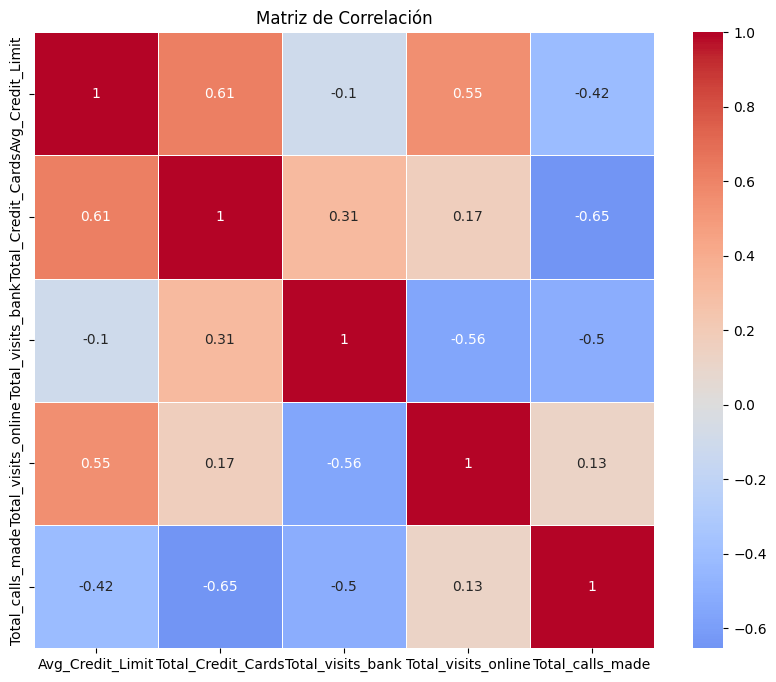

In [ ]:
# Crear un mapa de calor con una paleta personalizada y mayor control visual
plt.figure(figsize=(10, 8))
sns.heatmap(df_escalado.corr(), annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Como vemos en el mapa de calor,  no hay relaciones lineales fuertes entre las variables, ya que los valores no se acercan a 1 o -1.
Las variables parecen ser relativamente independientes, lo que podría ser ideal para ciertos modelos como por ejemplo K-Means.

**Visualización de Relaciones entre Variables:**

Utilizamos sns.pairplot() para mostrar la relación entre cada par de variables del dataset escalado. Los gráficos de dispersión revelan posibles patrones o relaciones no lineales, mientras que las distribuciones marginales se muestran como estimaciones de densidad (KDE). Esto permite identificar agrupaciones, patrones, y posibles relaciones complejas entre las características.

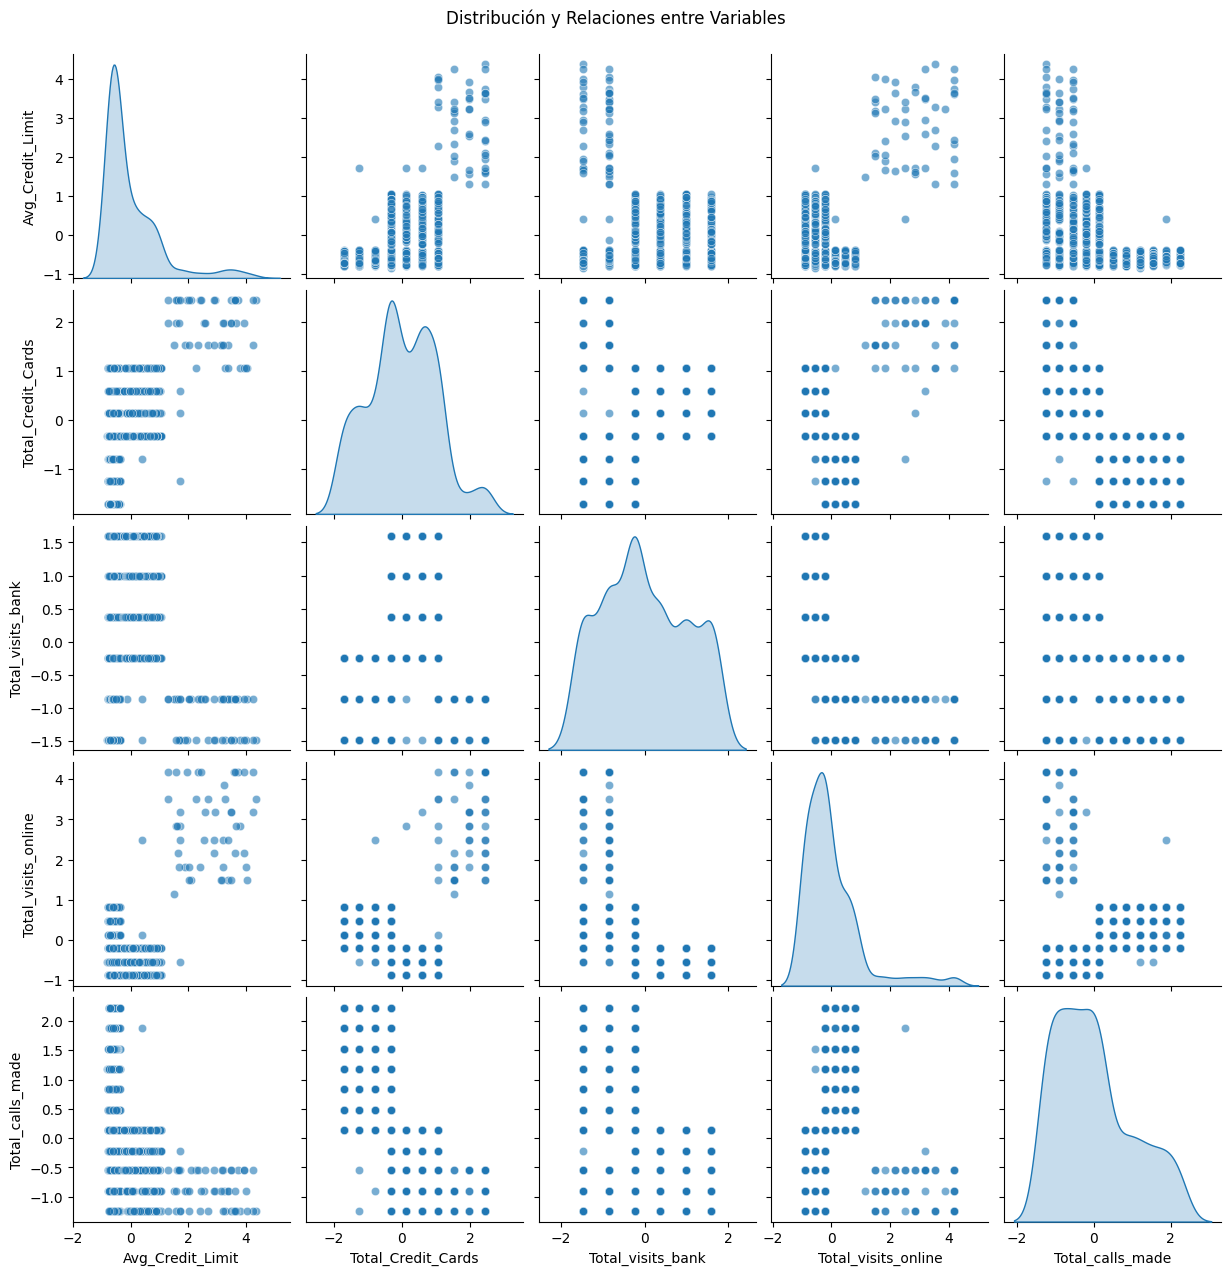

In [ ]:
sns.pairplot(df_escalado, diag_kind="kde", plot_kws={"alpha": 0.6}, height=2.5)
plt.suptitle("Distribución y Relaciones entre Variables", y=1.02)
plt.show()

**Análisis de los gráficos**

- La distribución diagonal es binomial o sesgada para varias variables (por ejemplo, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_online). Esto indica que estas propiedades pueden no estar distribuidas normalmente.
- En algunos casos, los elementos están muy dispersos, lo que indica que no existe una relación fuerte entre estas variables.
- La relación entre Total_visits_online y Total_calls_made tiene un patrón Esto parece sugerir que puede haber una interacción entre las visitas en línea y las llamadas, lo que puede ser indicativo de comportamientos o hábitos comunes para algunos usuarios.
- Agrupación: Variables como Avg_Credit_Limit y Total_Credit_Cards tienen concentraciones de grupo en áreas específicas. Esto puede indicar que ciertos grupos de clientes tienen características similares.

**Selección del Número de Clusters con el Método del Codo:**

El Método del Codo es una técnica para determinar el número óptimo de clusters en un modelo K-Means. Se ajustan modelos con diferentes valores de k (número de clusters) y se calcula la distorsión (o inercia), que es la suma de las distancias de cada punto al centro de su respectivo cluster. El valor óptimo de k se selecciona observando el "codo" en la curva, donde la reducción en la distorsión comienza a ser menos pronunciada. Esto indica que agregar más clusters no mejora significativamente el modelo.

k=1, Distorsión=3246.3491953775047
k=2, Distorsión=2097.6869389682797
k=3, Distorsión=912.6364252616066
k=4, Distorsión=763.8562871777534
k=5, Distorsión=714.3907577610686
k=6, Distorsión=640.4217025311509
k=7, Distorsión=587.7503759411508
k=8, Distorsión=565.307577916613
k=9, Distorsión=528.694406769863


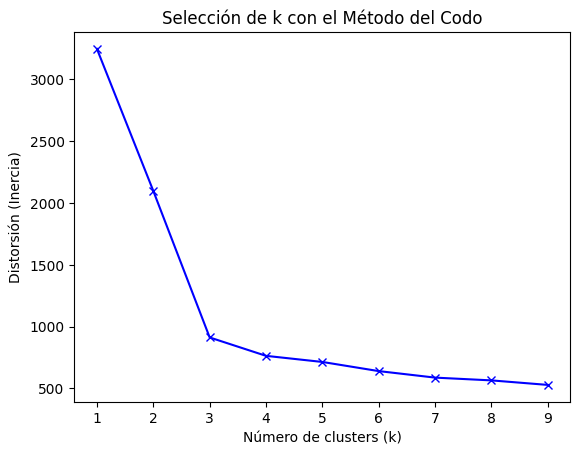

In [ ]:
# Método del Codo para seleccionar el valor óptimo de k en KMeans
distortions = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_escalado)
    distortion = model.inertia_  # Inertia es la distorsión calculada internamente
    distortions.append(distortion)

    print(f'k={k}, Distorsión={distortion}')

# Graficamos la curva del codo
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión (Inercia)')
plt.title('Selección de k con el Método del Codo')
plt.show()

Con los resultados obtenidos en el gráfico del método del codo, podemos observar la cantidad de clusters en la que la distorsión disminuye de forma más pronunciada. El valor de k en el "codo" es típicamente el número ideal de clusters para dividir los datos. Así el codo se encuentra en k=3, esto indicaría que dividir los datos en 3 clusters es el mejor enfoque en términos de variabilidad explicada.

## **Aplicación de Modelos de Aprendizaje No Supervisado**


### **Aplicamos el Modelo KMeans:**

El modelo KMeans se ajusta al dataset con k=3, lo que significa que estamos agrupando los datos en tres clusters. Utilizamos el parámetro n_init=20 para asegurarnos de que el algoritmo se ejecute varias veces con diferentes inicializaciones y elija la mejor solución en cuanto a distorsión. Las etiquetas de los clusters asignadas a cada punto se guardan en la variable labels y se añaden al dataframe original. Posteriormente, se pueden usar estas etiquetas para analizar qué clientes pertenecen a cada grupo y cómo se distribuyen las características de los diferentes clusters.

In [ ]:
# Aplicación de KMeans con el número óptimo de clusters (k=3 en este caso)
kmeans = KMeans(n_clusters=3, n_init=20, random_state=63)
kmeans.fit(df_escalado)

# Guardar las predicciones (etiquetas de los clusters)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al dataframe para análisis posterior
df_escalado['Cluster'] = labels

# Visualización de los centros de los clusters
centroids = kmeans.cluster_centers_
print("Centros de los clusters:", centroids)

Centros de los clusters: [[-0.02100529  0.36851852  0.67013228 -0.5562963  -0.55687831]
 [-0.59837104 -1.06058824 -0.89366516  0.32072398  1.14809955]
 [ 2.8098      1.8586     -1.108       2.804      -0.8722    ]]


Después de ejecutar el modelo, tenemos el cluster al que pertenece cada uno de los datos. Esto nos permite identificar patrones o comportamientos comunes dentro de cada grupo de clientes. Las características de los diferentes clusters podrían ser muy útiles para segmentar a los clientes según su comportamiento o sus necesidades.

**Agregar Etiquetas de Clusters al Dataset:**

En este paso, copiamos el dataset escalado y añadimos una nueva columna denominada Cluster, que contiene las etiquetas de los clusters asignados por el modelo KMeans. Esto permite tener una visión clara de a qué grupo pertenece cada cliente, lo que facilita un análisis posterior de las características y comportamiento de cada grupo. Es útil para segmentar los datos según el modelo y aplicar estrategias de marketing, análisis o personalización basadas en el cluster al que pertenece cada observación.

In [ ]:
dataset = df_escalado.copy()
dataset['Cluster'] = labels
dataset.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.72,-1.25,-0.86,-0.55,-1.25,0
1,0.40,-0.79,-1.48,2.50,1.88,1
2,0.40,1.05,-0.86,0.13,0.14,0
3,-0.13,0.13,-0.86,-0.55,0.14,0
4,1.72,0.59,-1.48,3.18,-0.21,2


**Calculamos el Silhouette Score para evaluar la calidad de los clusters generados.**

Este puntaje oscila entre -1 y 1, donde un valor cercano a 1 indica clusters bien definidos, 0 sugiere clusters superpuestos, y valores negativos indican asignaciones incorrectas. En este caso, interpretamos el puntaje promedio obtenido para decidir si los clusters son útiles para análisis posteriores.



In [ ]:
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(dataset.drop('Cluster', axis=1), dataset['Cluster'])
print(f"El Silhouette Score promedio para los clusters generados es: {silhouette_avg:.3f}")

El Silhouette Score promedio para los clusters generados es: 0.517


Dado que el puntaje está por encima de 0.5, indica que el modelo está funcionando de forma aceptable, pero no es excelente.

### **Aplicamos modelo DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos basándose en la densidad de los datos. Es útil para detectar clusters de formas arbitrarias y para identificar ruido o valores atípicos.

Silhouette Score para DBSCAN: 0.274918386373442


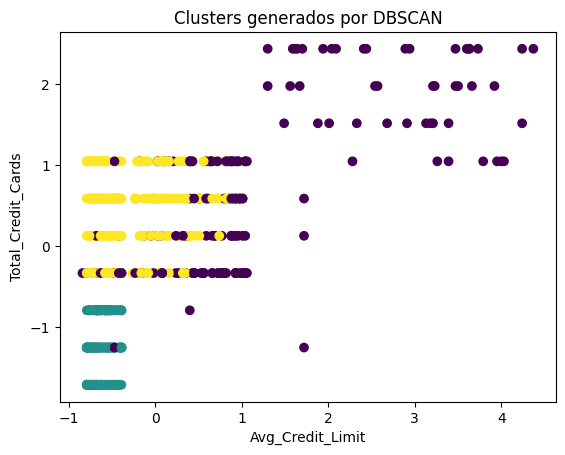

Etiquetas generadas por DBSCAN: {0, 1, -1}
Número de clusters encontrados (sin contar ruido): 2
Número de puntos clasificados como ruido (-1): 204


In [ ]:
# Crear el modelo DBSCAN con hiperparámetros iniciales
dbscan = DBSCAN(eps=0.9, min_samples=30)
dbscan_labels = dbscan.fit_predict(dataset.drop(['Cluster'], axis=1))

# Agregar las etiquetas generadas por DBSCAN al dataset
dataset['DBSCANLabel'] = dbscan_labels

# Calcular el Silhouette Score
dbscan_silhouette = silhouette_score(dataset.drop(['Cluster', 'DBSCANLabel'], axis=1), dbscan_labels)
print(f"Silhouette Score para DBSCAN: {dbscan_silhouette}")

# Visualización de los clusters generados por DBSCAN
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_Credit_Cards'], c=dbscan_labels, cmap='viridis')
plt.title('Clusters generados por DBSCAN')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.show()

# Imprimir resumen de etiquetas
unique_labels = set(dbscan_labels)
print(f"Etiquetas generadas por DBSCAN: {unique_labels}")
print(f"Número de clusters encontrados (sin contar ruido): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Número de puntos clasificados como ruido (-1): {(dbscan_labels == -1).sum()}")

**Optimización de eps y n_min_samples**

El resultado que arroja DBSCAN es infoerior al obtenido con KMEans, por lo tanto vamos a tratar de optimizar los parámetros de eps (radio máximo en el que DBSCAN considera que dos puntos son vecinos) y min_samples (número mínimo de puntos dentro del radio eps), para buscar el mejor valor del Silhoutte Score, de esta manera planteamos los siguiente:

Mejor eps: 1.8000000000000005
Mejor min_samples: 35
Mejor Silhouette Score: 0.504696977255881
Etiquetas generadas por DBSCAN: {0, 1, -1}
Número de clusters encontrados (sin contar ruido): 2
Número de puntos clasificados como ruido (-1): 204


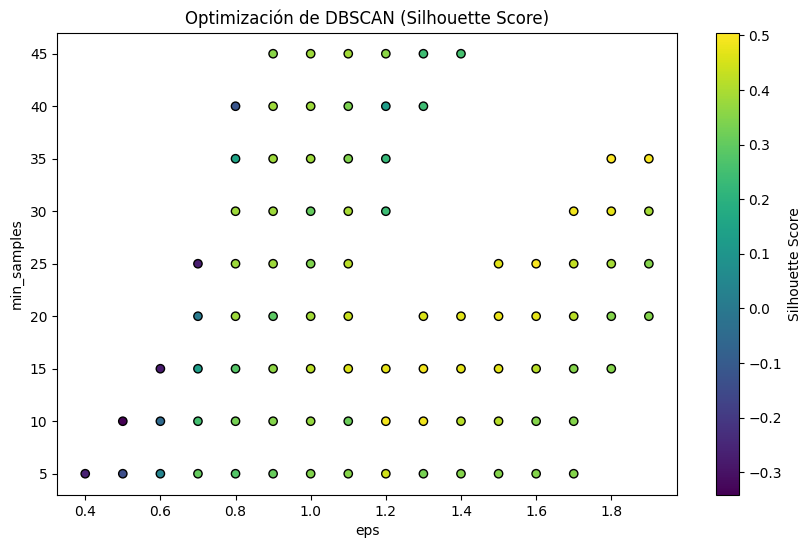

In [ ]:
# Definir los rangos de búsqueda para eps y min_samples
eps_values = np.arange(0.2, 2.0, 0.1)  # Probar eps desde 0.2 hasta 2.0 con incrementos de 0.1
min_samples_values = range(5, 50, 5)   # Probar min_samples desde 5 hasta 50 con incrementos de 5

best_eps = None
best_min_samples = None
best_silhouette = -1  # Silhouette Score varía de -1 a 1, por eso iniciamos con el peor valor

# Almacenar los resultados
results = []

# Generar todas las combinaciones de eps y min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(dataset.drop(['Cluster'], axis=1))

    # Verificamos si hay más de un cluster (sin contar ruido)
    if len(set(labels)) > 1 and -1 in labels:
        num_clusters = len(set(labels)) - 1  # Restamos el ruido (-1)
    else:
        num_clusters = len(set(labels))

    # Solo calcular Silhouette si hay al menos 2 clusters
    if num_clusters > 1:
        score = silhouette_score(dataset.drop(['Cluster'], axis=1), labels)
        results.append((eps, min_samples, num_clusters, score))

        # Guardar la mejor configuración
        if score > best_silhouette:
            best_silhouette = score
            best_eps = eps
            best_min_samples = min_samples

# Convertir los resultados a un DataFrame para análisis
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'num_clusters', 'silhouette_score'])

# Mostrar la mejor configuración
print(f"Mejor eps: {best_eps}")
print(f"Mejor min_samples: {best_min_samples}")
print(f"Mejor Silhouette Score: {best_silhouette}")

# Graficar el Silhouette Score en función de eps y min_samples
plt.figure(figsize=(10,6))
plt.scatter(results_df['eps'], results_df['min_samples'], c=results_df['silhouette_score'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Silhouette Score')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.title('Optimización de DBSCAN (Silhouette Score)')
print(f"Etiquetas generadas por DBSCAN: {unique_labels}")
print(f"Número de clusters encontrados (sin contar ruido): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Número de puntos clasificados como ruido (-1): {(dbscan_labels == -1).sum()}")
plt.show()

El metodo DBSCAN arroja un resultado inferior al obtenido con Kmeans para este dataset, por lo tanto **elegimos el modelo KMeans para continuar con el desarrollo del proyecto.**

### **Visualización de los Clusters en 2D:**

Debido a que el dataset tiene más de dos dimensiones, no es posible representar todos los clusters en un gráfico 2D. Sin embargo, podemos seleccionar dos características y analizarlos de esta manera para crear un gráfico de dispersión. En este gráfico, cada punto está coloreado según el cluster al que pertenece, lo que permite observar cómo se agrupan los clientes en función de estas dos variables. Esta visualización es útil para entender la distribución de los clusters en el espacio de características y las diferencias entre ellos.

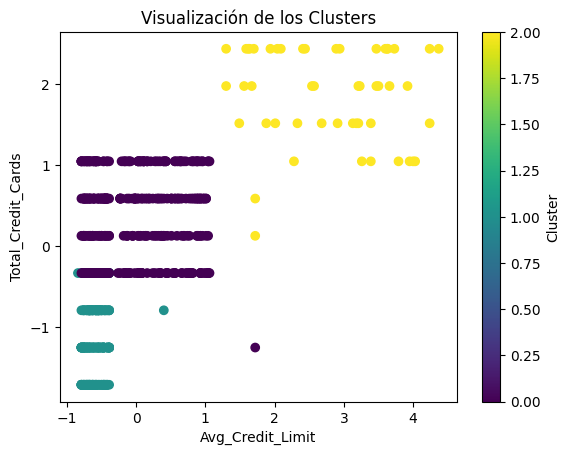

In [ ]:
# Visualización de los clusters utilizando 'Avg_Credit_Limit' y 'Total_Credit_Cards'
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_Credit_Cards'], c=dataset['Cluster'], cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Visualización de los Clusters')
plt.colorbar(label='Cluster')
plt.show()

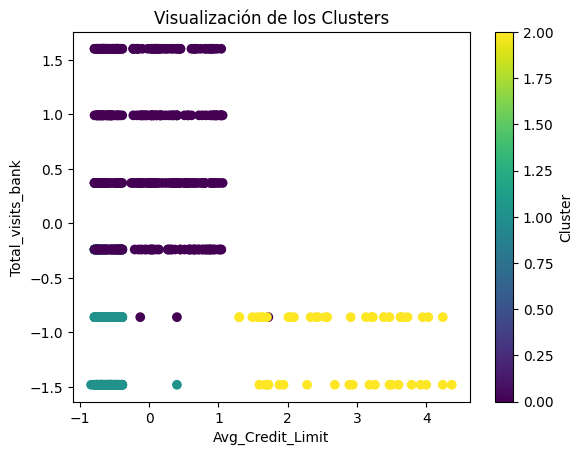

In [ ]:
# Visualización de los clusters utilizando 'Avg_Credit_Limit' y 'Total_visits_bank'
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_visits_bank'], c=dataset['Cluster'], cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_visits_bank')
plt.title('Visualización de los Clusters')
plt.colorbar(label='Cluster')
plt.show()

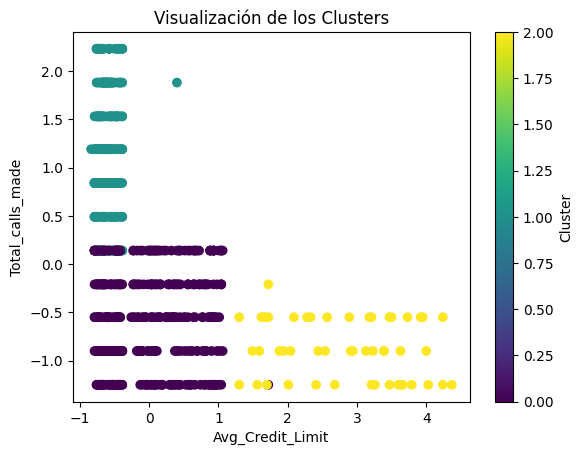

In [ ]:
# Visualización de los clusters utilizando 'Avg_Credit_Limit' y 'Total_calls_made'
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_calls_made'], c=dataset['Cluster'], cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_calls_made')
plt.title('Visualización de los Clusters')
plt.colorbar(label='Cluster')
plt.show()

### **Distribución de Variables por Cluster con Boxplots:**

En este paso, hemos generado un conjunto de boxplots (diagrama de caja) para cada variable del dataset, agrupados por los clusters obtenidos con KMeans. Cada boxplot muestra la distribución de cada variable para los distintos grupos de clientes. Este análisis permite visualizar de manera clara cómo se distribuyen las características dentro de cada cluster y puede ayudar a identificar valores atípicos o diferencias notables entre los grupos.

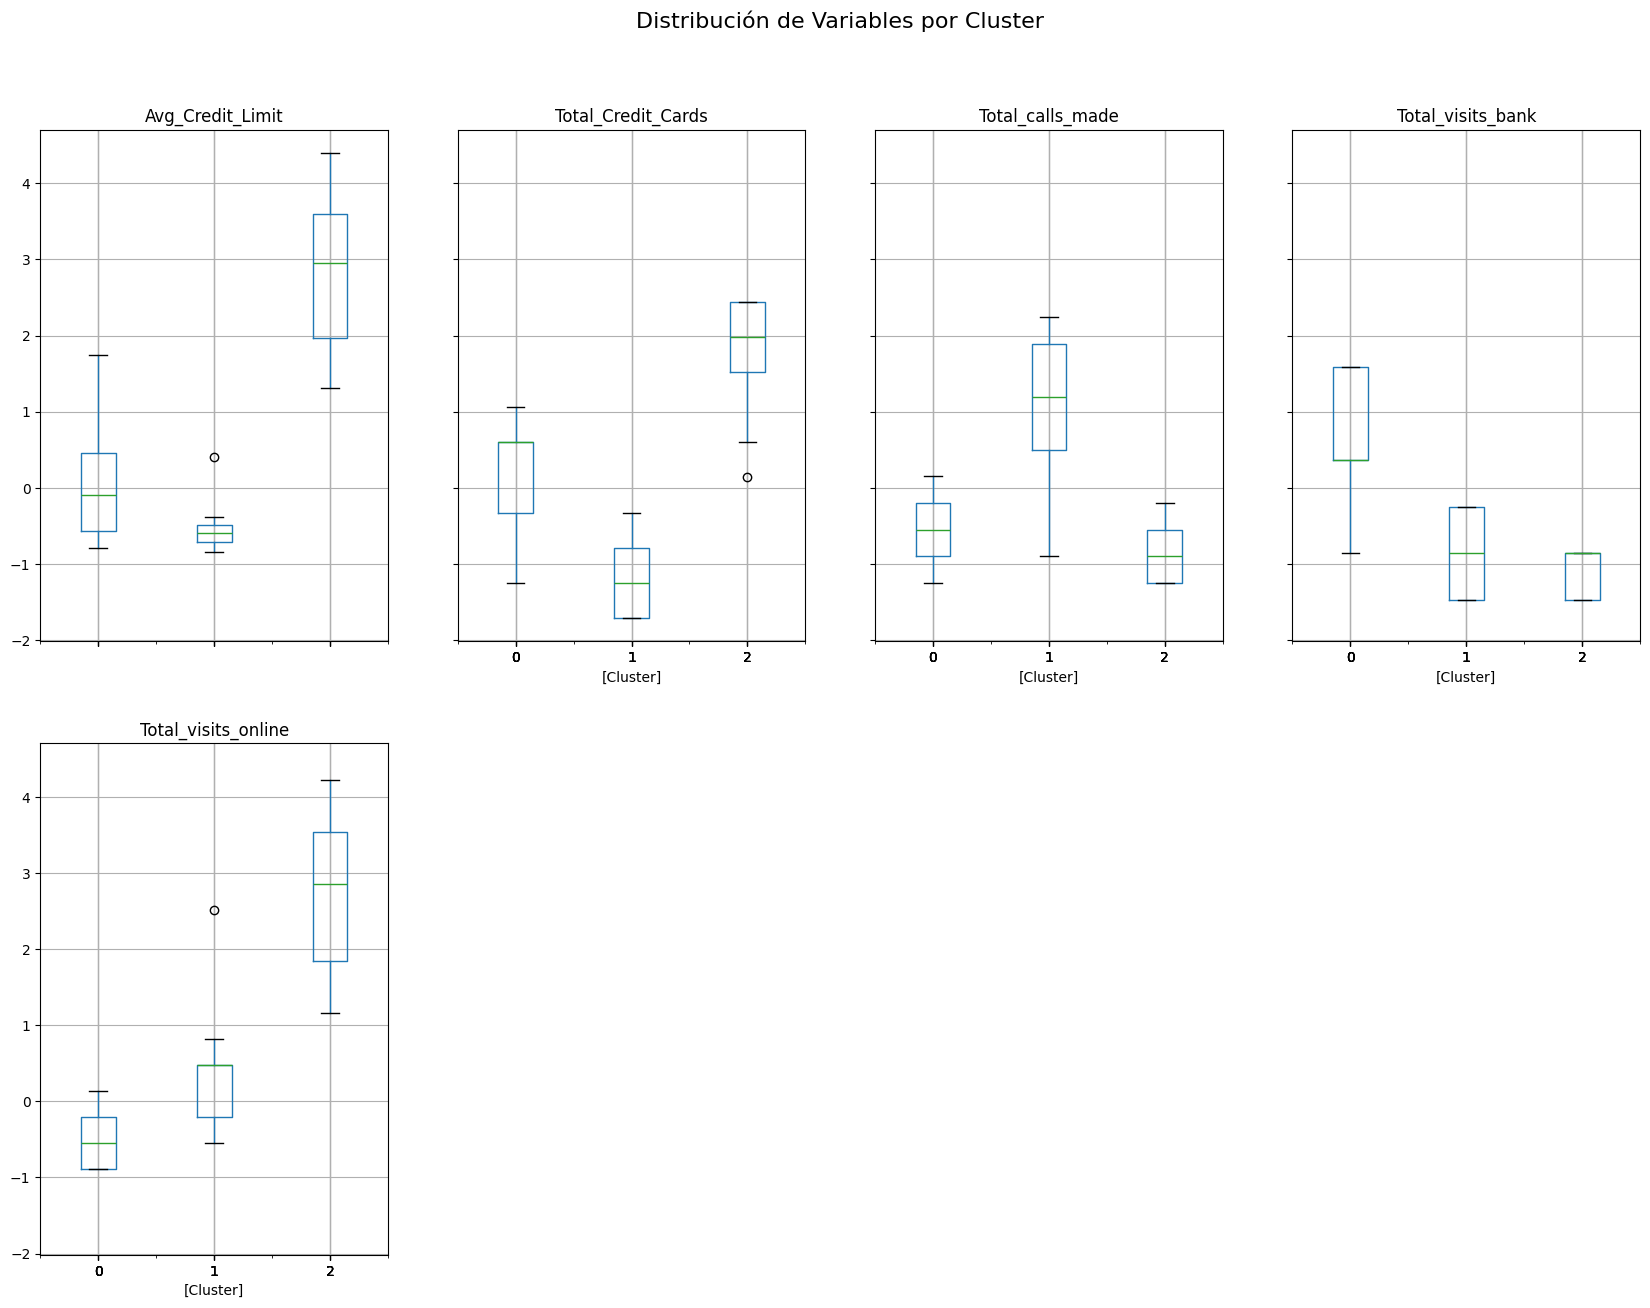

In [ ]:
# Boxplot por Clusters para observar la distribución de las variables
dataset.boxplot(by='Cluster', layout=(2, 4), figsize=(20, 15))
plt.suptitle('Distribución de Variables por Cluster', fontsize=16)
plt.show()

- Avg_Credit_Limit:

En el Cluster 1, el límite de crédito promedio es más bajo en comparación con los otros clusters, como lo indican los valores más cercanos al mínimo y la mediana en la parte baja.
El Cluster 0 tiene un rango más amplio de valores, lo que sugiere una mayor variabilidad en los límites de crédito dentro de este grupo.
El Cluster 2 tiene una mediana más alta y parece concentrarse en valores mayores de límite de crédito, lo que indica que este grupo tiene clientes con mayores límites de crédito en comparación con los otros clusters.

- Total_Credit_Cards:

Los clientes del Cluster 1 parecen tener la menor cantidad de tarjetas de crédito, lo que podría ser una característica distintiva de este grupo.
En el Cluster 0, los valores están distribuidos de forma más equilibrada, con algunos clientes teniendo una cantidad considerablemente mayor de tarjetas.
El Cluster 2 muestra una distribución que indica que este grupo tiene más tarjetas de crédito en promedio, lo que podría ser un indicativo de clientes más activos o con una mayor capacidad crediticia.

- Total_calls_made:

Los Clusters 0 y 2 tiene un número de llamadas muy bajo, lo que sugiere que este grupo de clientes podría ser menos activo en cuanto a la interacción telefónica con el banco.
El Cluster 1 tiene un mayor número de llamadas realizadas, lo que sugiere que este grupo es más dependiente del contacto telefonico.

- Total_visits_bank:

El Cluster 2 tiene un número de visitas al banco más bajo, lo que podría sugerir que estos clientes prefieren realizar sus operaciones de forma más digital o remota.
El Cluster 0 tiene un número de visitas más alto, indicando que estos clientes probablemente prefieren realizar operaciones presenciales en la sucursal.
El Cluster 2 muestra una variabilidad interesante en el número de visitas, lo que podría indicar que los clientes de este grupo tienen comportamientos mixtos entre visitas físicas y digitales.

- Total_visits_online:

El Cluster 0 muestra una menor cantidad de visitas online, lo que podría sugerir que estos clientes no están tan interesados o no tienen acceso frecuente a los servicios en línea del banco.
El Cluster 1 tiene una mayor interacción online, aunque sigue siendo baja.
El Cluster 2 tiene una distribución más alta de visitas online, lo que puede indicar que estos clientes están más inclinados a usar servicios en línea.

**Conclusiones:**

*Diferenciación de Clientes:* Este análisis revela que los clusters se distinguen principalmente por características como el límite de crédito, la cantidad de tarjetas de crédito y el número de interacciones con el banco, tanto en términos de visitas físicas como online. Esto puede ser útil para personalizar servicios bancarios según las preferencias y comportamientos de cada grupo de clientes.

*Clientes Digitales vs. Tradicionales:* Los Clusters 0 y 1 parecen estar más alineados con clientes tradicionales, con menos actividad en línea y más visitas físicas al banco, mientras que el Cluster 2 muestra una mayor tendencia a usar servicios en línea. Este hallazgo podría influir en cómo se diseñan y promocionan los productos bancarios en función de la preferencia de cada tipo de cliente.

*Segmentación para Estrategias de Marketing:* Entender estas diferencias entre clusters puede ser clave para diseñar estrategias de marketing y promociones personalizadas. Por ejemplo, los clientes con un mayor Total_Credit_Cards podrían ser objetivo para promociones que ofrezcan productos adicionales, mientras que aquellos con menos tarjetas podrían beneficiarse de ofertas para aumentar su número de productos financieros.

## **Análisis de la Segmentación de Clientes**
Para cada característica seleccionada, generamos estadísticas descriptivas como el promedio, el valor mínimo y máximo, agrupando por etiqueta de cluster. Este análisis nos ayuda a identificar patrones o tendencias específicas dentro de cada grupo, proporcionando una visión más profunda sobre cómo las características contribuyen a la segmentación de los datos.

In [ ]:
dataset.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Cluster'],
      dtype='object')

In [ ]:
df2.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
# Tomamos el dataset original antes de escalarlo, para ver los valores reales en cada categoría
df2['Cluster']=dataset['Cluster']

In [ ]:
# Creamos un diccionario para almacenar los resultados
summary_stats = {}

for each in df2.columns:
    # Calculamos estadísticas descriptivas agrupadas por clusters
    if each == 'Cluster':
        continue  # No es necesario calcular estadísticas para la etiqueta de cluster
    stats = df2.groupby('Cluster')[each].describe()[['count', 'mean', 'min', 'max']].round()
    summary_stats[each] = stats  # Guardamos resultados en el diccionario

    print(f"Feature: {each}")
    print(stats)
    print("\n")

Feature: Avg_Credit_Limit
         count      mean      min       max
Cluster                                    
0.0      370.0   33632.0   5000.0  100000.0
1.0      218.0   12294.0   3000.0   50000.0
2.0       50.0  119660.0  27000.0  200000.0


Feature: Total_Credit_Cards
         count  mean  min   max
Cluster                        
0.0      370.0   5.0  1.0   7.0
1.0      218.0   2.0  1.0   6.0
2.0       50.0   8.0  4.0  10.0


Feature: Total_visits_bank
         count  mean  min  max
Cluster                       
0.0      370.0   3.0  1.0  5.0
1.0      218.0   1.0  0.0  5.0
2.0       50.0   1.0  0.0  4.0


Feature: Total_visits_online
         count  mean  min   max
Cluster                        
0.0      370.0   1.0  0.0   4.0
1.0      218.0   4.0  1.0  10.0
2.0       50.0   9.0  0.0  15.0


Feature: Total_calls_made
         count  mean  min   max
Cluster                        
0.0      370.0   2.0  0.0   8.0
1.0      218.0   7.0  1.0  10.0
2.0       50.0   1.0  0.0   3.0



El análisis segmentó a los clientes en **tres clusters**, cada uno con características distintivas que revelan patrones de comportamiento y perfil financiero. Estas conclusiones pueden guiar estrategias para campañas de marketing, mejoras en ventas y personalización de servicios.

---

### **Análisis por clusters:**

#### ✅ **Cluster 0** (Clientes promedio):
- **Promedio de crédito (Avg_Credit_Limit):** $33,782 (rango: $5,000 - $100,000).
- **Tarjetas de crédito promedio (Total_Credit_Cards):** 6 (entre 2 y 7).
- **Visitas al banco (Total_visits_bank):** 3 visitas promedio (moderado).
- **Interacción online (Total_visits_online):** Muy baja (1 visita promedio, hasta 3).
- **Llamadas realizadas (Total_calls_made):** Muy pocas (2 llamadas promedio).

**Interpretación:**  
Clientes típicos, con crédito medio-alto y uso moderado de servicios bancarios. Este grupo tiene el mayor número de miembros (386), por lo que representa el grueso de la base de clientes.

**Estrategias:**
- Ofrecer productos financieros avanzados, como tarjetas con beneficios exclusivos.
- Incentivar más interacciones online para reducir costos operativos en sucursales y llamadas.

---

#### ✅ **Cluster 1** (Clientes de bajo crédito y tradicionales):
- **Promedio de crédito (Avg_Credit_Limit):** $12,174 (rango: $3,000 - $50,000).
- **Tarjetas de crédito promedio (Total_Credit_Cards):** 2 (entre 1 y 4).
- **Visitas al banco (Total_visits_bank):** Muy bajas (1 visita promedio, máximo 2).
- **Interacción online (Total_visits_online):** Alta (4 visitas promedio, hasta 10).
- **Llamadas realizadas (Total_calls_made):** Alta (7 llamadas promedio, hasta 10).

**Interpretación:**  
Clientes con bajo límite de crédito, alta dependencia de canales de atención (llamadas y online), y baja frecuencia de visitas físicas al banco. Son **224 clientes**, el segundo grupo más grande.

**Estrategias:**
- Enfocar campañas educativas para mejorar la salud financiera de estos clientes, como aumentar el crédito responsable.
- Optimizar canales online y telefónicos para personalizar la experiencia y reducir costos.

---

#### ✅ **Cluster 2** (Clientes premium digitales):
- **Promedio de crédito (Avg_Credit_Limit):** $141,040 (rango: $84,000 - $200,000).
- **Tarjetas de crédito promedio (Total_Credit_Cards):** 9 (entre 5 y 10).
- **Visitas al banco (Total_visits_bank):** Muy bajas (promedio 1, máximo 1).
- **Interacción online (Total_visits_online):** Muy alta (11 visitas promedio, hasta 15).
- **Llamadas realizadas (Total_calls_made):** Muy pocas (1 llamada promedio).

**Interpretación:**  
Clientes con alto poder adquisitivo, fuerte presencia en plataformas digitales, y mínima interacción física o telefónica. Este es el grupo más pequeño, con **50 clientes**, pero representa un valor alto.

**Estrategias:**
- Ofrecer productos exclusivos, como inversiones personalizadas y tarjetas premium con beneficios significativos.
- Mantener y fortalecer la infraestructura digital para maximizar la experiencia del cliente.
- Incentivar referencias o programas de lealtad para atraer a más clientes de este perfil.

---

## 📌**Conclusiones del análisis por clustering**

### 📌**Conclusiones generales:**

1. **Personalización de estrategias:**
   - Cada cluster tiene patrones distintos que pueden usarse para diseñar campañas específicas de marketing, productos financieros, y mejoras en el servicio.
   - El cluster **2** requiere atención especial debido a su alto valor, mientras que el cluster **1** ofrece una oportunidad para mejorar la retención y fidelización.

2. **Optimización de canales:**
   - Los datos resaltan la creciente importancia de los canales digitales. Invertir en plataformas online y optimizar la atención telefónica puede reducir costos y mejorar la satisfacción del cliente.

3. **Gestión de recursos:**
   - Reducir visitas físicas y llamadas para los clusters **0** y **1** mediante el uso de herramientas digitales.
   - Priorizar interacciones de alta calidad con los clientes premium (Cluster 2) para aumentar su lealtad y rentabilidad.

4. **Impacto en ventas:**
   - Identificar oportunidades para cross-selling y up-selling, especialmente en clusters **0** y **1**.
   - Diseñar estrategias de retención para el cluster **1**, ya que son más propensos a cambiar de banco por sus menores límites de crédito.

5. **Mejoras a futuro:**
   - Evaluar la evolución de estos patrones en el tiempo.
   - Implementar encuestas para validar los supuestos obtenidos en el análisis.
   - Ampliar las caracteristicas del dataset para disponer de otras variables que nos ayuden a identificar mejor a los clientes (edad, consumo promedio, ingresos, ocupación, estado civil).

---